<a href="https://colab.research.google.com/github/Chirag314/Housingprice-multiple-regression/blob/main/Housingprice_multiple_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###This notebook is copied from exercises from book Ensemble Machine Learning Cookbook.

In [20]:
#import required libraries
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression, SGDRegressor
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import KFold,LeaveOneOut
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample

In [21]:
# Read data from github. Use raw format and copy url# Note normal url and raw url will be different.
import pandas as pd
pd.options.display.max_rows=None
pd.options.display.max_columns=None
url = 'https://raw.githubusercontent.com/PacktPublishing/Ensemble-Machine-Learning-Cookbook/master/Chapter04/Linear%20regression/Final_HousePrices.csv'
df_housingdata = pd.read_csv(url)
#df = pd.read_csv(url)
print(df_housingdata.head(5))

   MSSubClass MSZoning  LotFrontage  LotArea Street     Alley LotShape  \
0          60       RL           65     8450   Pave  NoAccess      Reg   
1          20       RL           80     9600   Pave  NoAccess      Reg   
2          60       RL           68    11250   Pave  NoAccess      IR1   
3          70       RL           60     9550   Pave  NoAccess      IR1   
4          60       RL           84    14260   Pave  NoAccess      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7          

In [22]:
# Check the variables and their types
df_housingdata.dtypes

MSSubClass        int64
MSZoning         object
LotFrontage       int64
LotArea           int64
Street           object
Alley            object
LotShape         object
LandContour      object
Utilities        object
LotConfig        object
LandSlope        object
Neighborhood     object
Condition1       object
Condition2       object
BldgType         object
HouseStyle       object
OverallQual       int64
OverallCond       int64
YearBuilt         int64
YearRemodAdd      int64
RoofStyle        object
RoofMatl         object
Exterior1st      object
Exterior2nd      object
MasVnrType       object
MasVnrArea        int64
ExterQual        object
ExterCond        object
Foundation       object
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinSF1        int64
BsmtFinType2     object
BsmtFinSF2        int64
BsmtUnfSF         int64
TotalBsmtSF       int64
Heating          object
HeatingQC        object
CentralAir       object
Electrical      

In [23]:
#We'll then look at the correlation matrix. The corr() method computes the pairwise correlation of columns:
df_housingdata.corr(method='pearson')

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.356718,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.023573,-0.069836,-0.065649,-0.140759,-0.238518,-0.251758,0.307886,0.046474,0.074853,0.003491,-0.002333,0.131608,0.177354,-0.023438,0.281721,0.040380,-0.045569,-0.080997,-0.040110,-0.098672,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.356718,1.000000,0.304522,0.234812,-0.053281,0.116685,0.083348,0.178469,0.214367,0.042463,0.124098,0.363472,0.413773,0.072388,0.037469,0.368007,0.090343,-0.006979,0.180534,0.047222,0.236840,-0.004905,0.320518,0.233221,0.099196,0.269539,0.323511,0.075542,0.137014,0.010287,0.061945,0.037655,0.180819,-0.000255,0.010451,0.006380,0.334771
LotArea,-0.139781,0.304522,1.000000,0.105806,-0.005636,0.014228,0.013788,0.103321,0.214103,0.111170,-0.002618,0.260833,0.299475,0.050986,0.004779,0.263116,0.158155,0.048046,0.126031,0.014259,0.119690,-0.017784,0.190015,0.271364,0.072599,0.154871,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,0.032628,0.234812,0.105806,1.000000,-0.091932,0.572323,0.550684,0.407252,0.239666,-0.059119,0.308159,0.537808,0.476224,0.295493,-0.030429,0.593007,0.111098,-0.040150,0.550600,0.273458,0.101676,-0.183882,0.427452,0.396765,0.288998,0.600671,0.562022,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,-0.059316,-0.053281,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.125694,-0.046231,0.040229,-0.136841,-0.171098,-0.144203,0.028942,0.025494,-0.079686,-0.054942,0.117821,-0.194149,-0.060769,0.012980,-0.087001,-0.057583,-0.023820,-0.006515,-0.185758,-0.151521,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,0.027850,0.116685,0.014228,0.572323,-0.375983,1.000000,0.592855,0.311600,0.249503,-0.049107,0.149040,0.391452,0.281986,0.010308,-0.183784,0.199010,0.187599,-0.038162,0.468271,0.242656,-0.070651,-0.174800,0.095589,0.147716,0.272029,0.537850,0.478954,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,0.040581,0.083348,0.013788,0.550684,0.073741,0.592855,1.000000,0.176529,0.128451,-0.067759,0.181133,0.291066,0.240379,0.140024,-0.062419,0.287389,0.119470,-0.012337,0.439046,0.183331,-0.040581,-0.149598,0.191740,0.112581,0.146357,0.420622,0.371600,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,0.023573,0.178469,0.103321,0.407252,-0.125694,0.311600,0.176529,1.000000,0.261256,-0.071330,0.113862,0.360067,0.339850,0.173800,-0.068628,0.388052,0.083010,0.027403,0.272999,0.199108,0.102775,-0.038450,0.279568,0.247015,0.132696,0.361945,0.370884,0.159991,0.122528,-0.109907,0.019144,0.062248,0.011928,-0.029512,-0.006723,-0.008317,0.472614
BsmtFinSF1,-0.069836,0.214367,0.214103,0.239666,-0.046231,0.249503,0.128451,0.261256,1.000000,-0.050117,-0.495251,0.522396,0.445863,-0.137079,-0.064503,0.208171,0.649212,0.067418,0.058543,0.004262,-0.107355,-0.081007,0.044316,0.260011,0.115843,0.224054,0.296970,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420
BsmtFinSF2,-0.065649,0.042463,0.111170,-0.059119,0.040229,-0.049107,-0.067759,-0.071330,-0.050117,1.000000,-0.209294,0.104810,0.097117,-0.099260,0.014807,-0.009640,0.158678,0.070948,-0.076444,-0.032148,-0.015728,-0.040751,-0.035227,0.046921,0.035070,-0.038264,-0.018227,0.067898,0.003093,0.036543,-0.029993,0.088871,0.041709,0.004940,-0.015211,0.031706,-0.011378


In [24]:
#Besides this, we'd also like to study the correlation between the predictor variables and the response variable:
# we store the correlation matrix output in a variable
pearson=df_housingdata.corr(method='pearson')

# assume target attr is the last, then remove corr with itself
corr_wth_target=pearson.iloc[-1][:-1]

# attributes sorted from the most predictive
corr_wth_target.sort_values(ascending=False)

OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
MasVnrArea       0.472614
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.334771
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
GarageYrBlt      0.261366
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  if __name__ == '__main__':


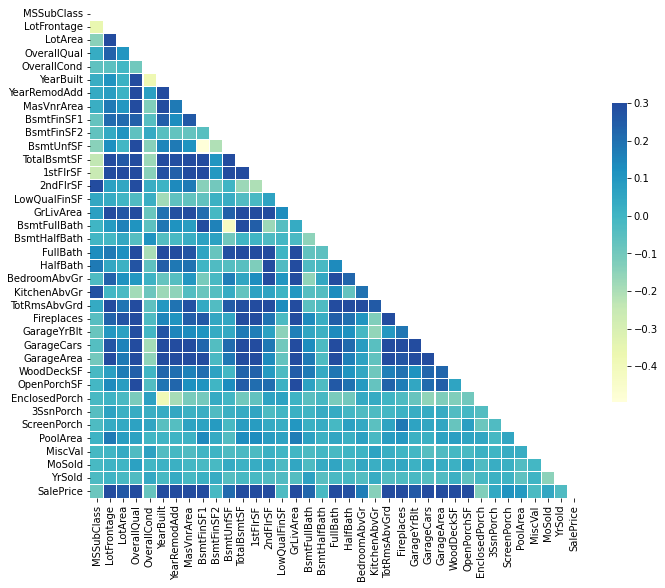

In [25]:
#We can look at the correlation plot using the heatmap() function from the seaborn package
f, ax = plt.subplots(figsize=(11, 11))

# Generate a mask for the upper triangle
# np.zeros_like - Return an array of zeros with the same shape and type as a given array
# In this case we pass the correlation matrix
# we create a variable “mask” which is a 14 X 14 numpy array

mask = np.zeros_like(pearson, dtype=np.bool)
tt = np.triu_indices_from(mask)

# We create a tuple with triu_indices_from() by passing the “mask” array
# k is used to offset diagonal
# with k=0, we offset all diagnoals
# If we put k=13, means we offset 14-13=1 diagonal

# triu_indices_from() Return the indices for the upper-triangle of arr.
mask[np.triu_indices_from(mask, k=0)] = True

# First 2 param - anchor hues for negative and positive extents of the map.
# 3rd param - Anchor saturation for both extents of the map
# If true, return a matplotlib colormap object rather than a list of colors.

cmap = sns.diverging_palette(10, 129, s=50, as_cmap=True)

# Adjust size of the legend bar with cbar_kws={“shrink”: 0.5}
# cmap=“YlGnBu” gives the color from Yellow-Green-Blue palette

sns.heatmap(pearson, mask=mask, cmap="YlGnBu", vmax=.3, center=0,
           square=True, linewidths=.1, cbar_kws={"shrink": 0.5})

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


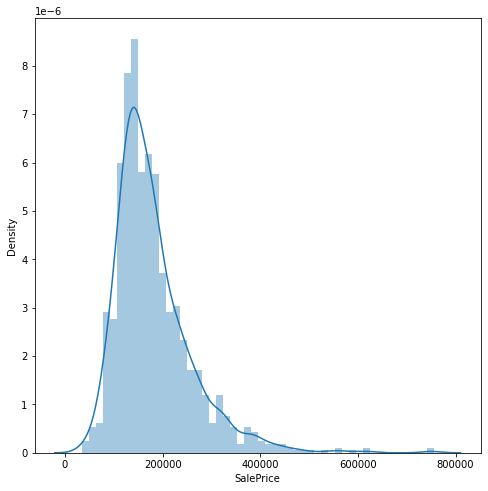

In [26]:
# Lets explore other data by visulizating other variables
plt.figure(figsize=(8,8))
sns.distplot(df_housingdata['SalePrice'],bins=50,kde=True)

#####We can also use JointGrid() from our seaborn package to plot a combination of plots

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.wa

AttributeError: ignored

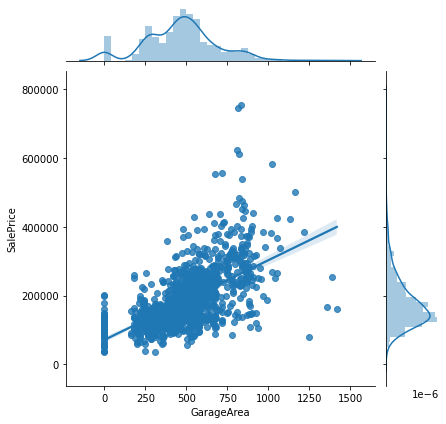

In [28]:
from scipy import stats
g=sns.JointGrid(df_housingdata['GarageArea'],df_housingdata['SalePrice'])
g=g.plot(sns.regplot,sns.distplot)
g=g.annotate(stats.pearsonr)


#####Let's now scale our numeric variables using min-max normalization. To do this, we first need to select only the numeric variables from our dataset

In [29]:
# create a variable to hold the names of the data types viz int16, in32 and so on
num_cols=['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

# Filter out variables with numeric data types
df_numcols_only=df_housingdata.select_dtypes(include=num_cols)

#####We will now apply the min-max scaling to our numeric variables:

In [30]:
from sklearn.preprocessing import MinMaxScaler
min_max=MinMaxScaler()

#caling down the numeric variables exclde saleprice
df_housingdata_numcols=pd.DataFrame(min_max.fit_transform(df_numcols_only.iloc[:,0:36]))

df_housingdata_numcols.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35
0,0.235294,0.150685,0.033420,0.666667,0.500,0.949275,0.883333,0.12250,0.125089,0.0,0.064212,0.140098,0.119780,0.413559,0.0,0.259231,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.500000,0.000000,0.996517,0.50,0.386460,0.000000,0.111517,0.000000,0.0,0.0,0.0,0.0,0.090909,0.50
1,0.000000,0.202055,0.038795,0.555556,0.875,0.753623,0.433333,0.00000,0.173281,0.0,0.121575,0.206547,0.212942,0.000000,0.0,0.174830,0.000000,0.5,0.666667,0.0,0.375,0.333333,0.333333,0.333333,0.983085,0.50,0.324401,0.347725,0.000000,0.000000,0.0,0.0,0.0,0.0,0.363636,0.25
2,0.235294,0.160959,0.046507,0.666667,0.500,0.934783,0.866667,0.10125,0.086109,0.0,0.185788,0.150573,0.134465,0.419370,0.0,0.273549,0.333333,0.0,0.666667,0.5,0.375,0.333333,0.333333,0.333333,0.995522,0.50,0.428773,0.000000,0.076782,0.000000,0.0,0.0,0.0,0.0,0.727273,0.50
3,0.294118,0.133562,0.038561,0.666667,0.500,0.311594,0.333333,0.00000,0.038271,0.0,0.231164,0.123732,0.143873,0.366102,0.0,0.260550,0.333333,0.0,0.333333,0.0,0.375,0.333333,0.416667,0.333333,0.994030,0.75,0.452750,0.000000,0.063985,0.492754,0.0,0.0,0.0,0.0,0.090909,0.00
4,0.235294,0.215753,0.060576,0.777778,0.500,0.927536,0.833333,0.21875,0.116052,0.0,0.209760,0.187398,0.186095,0.509927,0.0,0.351168,0.333333,0.0,0.666667,0.5,0.500,0.333333,0.583333,0.333333,0.995025,0.75,0.589563,0.224037,0.153565,0.000000,0.0,0.0,0.0,0.0,1.000000,0.50


Now, we will perform one-hot encoding on our categorical variables:

In [31]:
# We exclude all numeric columns
df_housingdata_catcol=df_housingdata.select_dtypes(exclude=num_cols)

# Steps to one-hot encoding:
# We iterate through each categorical column name
# Create encoded variables for each categorical columns
# Concatenate the encoded variables to the DataFrame
# Remove the original categorical variable

for col in df_housingdata_catcol.columns.values:
  one_hot_encoded_variables=pd.get_dummies(df_housingdata_catcol[col],prefix=col)
  df_housingdata_catcol=pd.concat([df_housingdata_catcol,one_hot_encoded_variables],axis=1)
  df_housingdata_catcol.drop([col],axis=1,inplace=True)


We have now created a DataFrame with only numeric variables that have been scaled. We have also created a DataFrame with only categorical variables that have been encoded. Let's combine the two DataFrames into a single DataFrame:

In [36]:
df_housedata=pd.concat([df_housingdata_numcols,df_housingdata_catcol],axis=1)


In [37]:
# Concatenate SalePrice to the final DataFrame
df_housedata_final = pd.concat([df_housedata, df_numcols_only.iloc[:,36]], axis=1)

In [40]:

#We can create our training and testing datasets using the train_test_split class from sklearn.model_selection:
from sklearn.model_selection import train_test_split
X= df_housedata_final.iloc[:,0:302]
Y=df_housedata_final['SalePrice']

X_train, X_test, Y_train, Y_test=train_test_split(X, Y, test_size=0.3,random_state=1)

We can now use SGDRegressor() to build a linear model. We fit this linear model by minimizing the regularized empirical loss with SGD:

In [42]:
from sklearn import linear_model
lin_model=SGDRegressor()

# We fit our model with train data
lin_model.fit(X_train, Y_train)

# We use predict() to predict our values
lin_model_predictions=lin_model.predict(X_test)

# We check the coefficient of determination with score()
print(lin_model.score(X_test,Y_test))

# We can also check the coefficient of determination with r2_score() from sklearn.metrics
from sklearn.metrics import r2_score
print(r2_score(Y_test,lin_model_predictions))

0.8592454259244855
0.8592454259244855


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


In [43]:
#We check the root mean square error (RMSE) on the test data:'

from sklearn.metrics import mean_squared_error
mse=mean_squared_error(Y_test,lin_model_predictions)
rsme=np.sqrt(mse)
print(rsme)

31702.212581708194


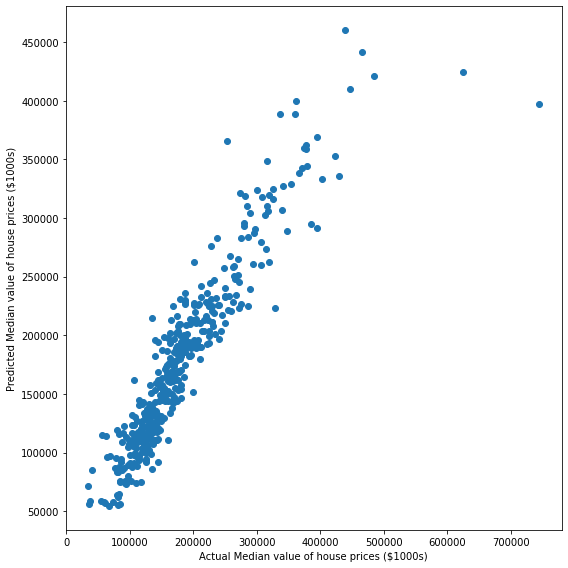

In [44]:
#We now plot the actual and predicted values using matplotlib.pyplot:
plt.figure(figsize=(8, 8))
plt.scatter(Y_test, lin_model_predictions)
plt.xlabel('Actual Median value of house prices ($1000s)')
plt.ylabel('Predicted Median value of house prices ($1000s)')
plt.tight_layout()

Because the chart shows most values in approximately a 45-degree diagonal line, our predicted values are quite close to the actual values, apart from a few.